
Congrats....again! Based off the amazing work you did on the classification model, you've been promoted to chief of all data scientists in Hollywood, your a total celebrity....among data scientists :).  

Your boss, head of the studio, has now asked you to build a model to predict gross revenue in order to help them decide which movies to invest in.

Once again, you would like to be able to explain the model to mere mortals but need a fairly robust and flexible approach so you've chosen to use decision trees to get started. 

In doing so...you leverage work you've done in the past to get the job done....you're a data scientist after all! 

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import sklearn

from sklearn.model_selection import train_test_split,RepeatedKFold,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

In [3]:
#1 Load data and clean 
movie_metadata = pd.read_csv("c:\\Users\\sarah\\OneDrive\\Documents\\DS3001_ML\\movie_metadata.csv")
movie_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [11]:
#cleaning 
#drop NA 
movie_metadata.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [12]:
#3 Check for missing variables and correct as needed
#drop NA create new df 
movie_metadata_2= movie_metadata.dropna()
movie_metadata_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3755 non-null   object 
 1   director_name              3755 non-null   object 
 2   num_critic_for_reviews     3755 non-null   float64
 3   duration                   3755 non-null   float64
 4   director_facebook_likes    3755 non-null   float64
 5   actor_3_facebook_likes     3755 non-null   float64
 6   actor_2_name               3755 non-null   object 
 7   actor_1_facebook_likes     3755 non-null   float64
 8   gross                      3755 non-null   float64
 9   genres                     3755 non-null   object 
 10  actor_1_name               3755 non-null   object 
 11  movie_title                3755 non-null   object 
 12  num_voted_users            3755 non-null   int64  
 13  cast_total_facebook_likes  3755 non-null   int64  
 1

In [13]:
#make features numeric 
movie_metadata_2.select_dtypes(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
5,Color,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,Béatrice Dalle,Drama|Music|Romance,Maggie Cheung,Clean,Don McKellar,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,French,France,R
5027,Color,Jafar Panahi,Nargess Mamizadeh,Drama,Fereshteh Sadre Orafaiy,The Circle,Mojgan Faramarzi,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,Persian,Iran,Not Rated
5033,Color,Shane Carruth,David Sullivan,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,Casey Gooden,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,English,USA,PG-13
5035,Color,Robert Rodriguez,Peter Marquardt,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Consuelo Gómez,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Spanish,USA,R


In [14]:
#cleaning
#make features numeric 
#drop director, actor, genres, movie title, imdb link? columns with many value count = 1? 
object_columns = movie_metadata_2.select_dtypes(include='object')
for column in object_columns:
    print(movie_metadata_2[column].value_counts())

color
Color               3631
 Black and White     124
Name: count, dtype: int64
director_name
Steven Spielberg    25
Woody Allen         19
Clint Eastwood      19
Ridley Scott        17
Martin Scorsese     16
                    ..
Noel Marshall        1
Todd Lincoln         1
Julian Jarrold       1
Peter Farrelly       1
Shane Carruth        1
Name: count, Length: 1658, dtype: int64
actor_2_name
Morgan Freeman           20
Charlize Theron          14
Brad Pitt                14
James Franco             11
Meryl Streep             10
                         ..
Christopher Heyerdahl     1
Anna Friel                1
Traylor Howard            1
James Brolin              1
Brian Herzlinger          1
Name: count, Length: 2187, dtype: int64
genres
Comedy|Drama|Romance                     147
Drama                                    141
Comedy|Drama                             138
Comedy                                   138
Comedy|Romance                           131
                  

In [15]:
#make features numeric 
object_columns = movie_metadata_2.select_dtypes(include='object')
object_columns

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
5,Color,Andrew Stanton,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,Béatrice Dalle,Drama|Music|Romance,Maggie Cheung,Clean,Don McKellar,jail|junkie|money|motel|singer,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,French,France,R
5027,Color,Jafar Panahi,Nargess Mamizadeh,Drama,Fereshteh Sadre Orafaiy,The Circle,Mojgan Faramarzi,abortion|bus|hospital|prison|prostitution,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,Persian,Iran,Not Rated
5033,Color,Shane Carruth,David Sullivan,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,Casey Gooden,changing the future|independent film|invention...,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,English,USA,PG-13
5035,Color,Robert Rodriguez,Peter Marquardt,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Consuelo Gómez,assassin|death|guitar|gun|mariachi,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Spanish,USA,R


In [16]:
#make features numeric 
columns_to_encode = ["color", 'director_name','actor_2_name', 'genres','actor_1_name', 'movie_title','actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']
movie_metadata_2[columns_to_encode] = OrdinalEncoder().fit_transform(movie_metadata_2[columns_to_encode])

C:\Users\sarah\AppData\Local\Temp\ipykernel_37552\4134368429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_metadata_2[columns_to_encode] = OrdinalEncoder().fit_transform(movie_metadata_2[columns_to_encode])


In [17]:
#make features numeric 
movie_metadata_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3755 non-null   float64
 1   director_name              3755 non-null   float64
 2   num_critic_for_reviews     3755 non-null   float64
 3   duration                   3755 non-null   float64
 4   director_facebook_likes    3755 non-null   float64
 5   actor_3_facebook_likes     3755 non-null   float64
 6   actor_2_name               3755 non-null   float64
 7   actor_1_facebook_likes     3755 non-null   float64
 8   gross                      3755 non-null   float64
 9   genres                     3755 non-null   float64
 10  actor_1_name               3755 non-null   float64
 11  movie_title                3755 non-null   float64
 12  num_voted_users            3755 non-null   int64  
 13  cast_total_facebook_likes  3755 non-null   int64  
 1

In [19]:
#2 Classify variables 
#independent and dependent variables
y = movie_metadata_2['gross']
x = movie_metadata_2.drop(columns='gross')

In [20]:
#5 Determine the range and the Mean Absolute Error (MAE) of the target
#range = 760505685.0
#to understand how the values in the gross column vary
gross_range = y.max() - y.min()

#MAE = 46691321.4451363
#absolute difference between predicted and actual values
gross_mae = np.mean(np.abs(y - y.mean()))
print('gross range', gross_range)
print('gross mae', gross_mae)

gross range 760505685.0
gross mae 46691321.4451363


In [21]:
#6 Split data into test, tune, and train (80/10/10)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=21)
x_tune, x_test, y_tune, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=49)

In [22]:
#7 Create the kfold object for cross validation
kf =RepeatedKFold(n_splits=10, n_repeats =5, random_state=42)
#splits is number of folds
#repeats is number of times the CV is repeated

In [23]:
#hyper-parameter search
param={
    "max_depth" : [1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    #"splitter":["best","random"],
    #"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
    #"min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    #"max_features":["auto","log2","sqrt",None],
    #"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
    #'min_impurity_decrease':[0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01],
    #'ccp_alpha':[.001,.01,.1]
        }

In [24]:
#scores for model to be built on 
sklearn.metrics.get_scorer_names()
#Root Mean Squared Error (RMSE) quantifies the average magnitude of errors between predicted and actual values, measures accuracy of the model
#R-squared measures how well the independent variable explains variability in the dependent variable
#Mean Absolute Error (MAE) measures the absolute difference between predicted and actual(true) values 

#need mse to find rmse

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [25]:
#8 Create the scoring metric (several measures) you will use to evaluate your model and the max depth hyperparameter
#for regression we want to maximize the score and minimize mse and mae, so we use neg_mean_squared_error and neg_mean_absolute_error
scoring= ['neg_mean_squared_error','r2','neg_mean_absolute_error']

In [26]:
#9 Build the regression tree object
reg=DecisionTreeRegressor(random_state=30)

#10 Use the kfold object and the scoring metric to find the best hyperparameter value for max depth via the grid search method
search = GridSearchCV(reg, param, scoring=scoring, n_jobs=-1, cv=kf,refit='r2')
#r2 values will reflect potential overfitting
#high r2 value represents a model that better explains variabiliy in the dependent variable 


#11 Fit the model to the training data
model = search.fit(x_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=42),
             estimator=DecisionTreeRegressor(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             refit='r2',
             scoring=['neg_mean_squared_error', 'r2',
                      'neg_mean_absolute_error'])

In [27]:
#12 What is the best depth value?
best= model.best_estimator_
print(best)
#depth of 5

DecisionTreeRegressor(max_depth=5, random_state=30)


In [28]:
#decision tree for the best estimator 
dot_data = export_graphviz(best, out_file =None,
               feature_names =x.columns,
               filled=True, 
                rounded=True, ) 
               
graph=graphviz.Source(dot_data)

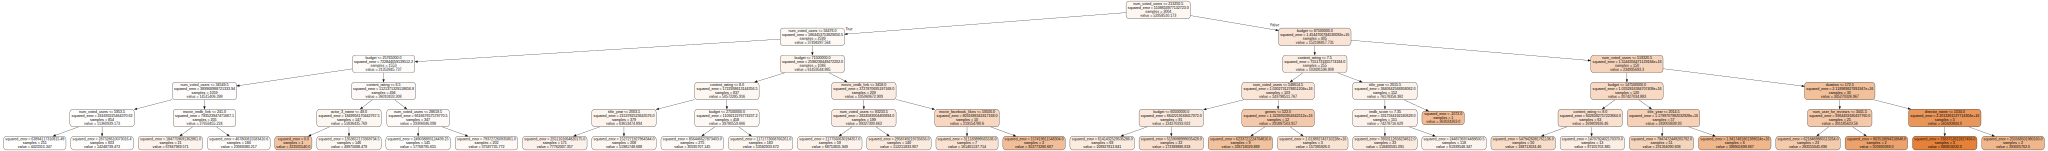

In [29]:
graph

In [30]:
#specific scores (rmse, r2, mae)
print(model.cv_results_) 

{'mean_fit_time': array([0.02311192, 0.03652934, 0.05464631, 0.07053105, 0.08824091,
       0.1040769 , 0.12614609, 0.1470001 , 0.16930868, 0.18638514,
       0.21651917, 0.2578378 , 0.27028077, 0.32050383, 0.3155594 ,
       0.38746619, 0.33534531, 0.32775012, 0.33270176, 0.33752955]), 'std_fit_time': array([0.00795384, 0.00854465, 0.00904304, 0.0065951 , 0.00664231,
       0.00577699, 0.00800767, 0.0143452 , 0.01051095, 0.0093929 ,
       0.03065834, 0.02422185, 0.01972738, 0.03612302, 0.0363321 ,
       0.07683331, 0.03806017, 0.0148722 , 0.01557474, 0.02228543]), 'mean_score_time': array([0.00675591, 0.00726548, 0.004948  , 0.00566504, 0.00481433,
       0.00458852, 0.00552601, 0.00673656, 0.00646891, 0.00505634,
       0.00611075, 0.00691178, 0.00710633, 0.00751701, 0.00692051,
       0.00822608, 0.00680468, 0.00503402, 0.00553325, 0.00468227]), 'std_score_time': array([0.00660744, 0.00759187, 0.00691985, 0.00600286, 0.00476784,
       0.00488299, 0.00510819, 0.00629501, 0.0056206

In [31]:
#mean_test and std_test for all scores, param_max_depth
print(model.cv_results_.keys())

#mean_test measures the average performance of scores across all folds, higher score indicates a better average performance
#std_test measures consistency of model performance across all folds, lower sd indicates a more consistent performance and a higher sd indicates more variability
#param_max_depth to find scores at max depths of the dt 

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_neg_mean_squared_error', 'split1_test_neg_mean_squared_error', 'split2_test_neg_mean_squared_error', 'split3_test_neg_mean_squared_error', 'split4_test_neg_mean_squared_error', 'split5_test_neg_mean_squared_error', 'split6_test_neg_mean_squared_error', 'split7_test_neg_mean_squared_error', 'split8_test_neg_mean_squared_error', 'split9_test_neg_mean_squared_error', 'split10_test_neg_mean_squared_error', 'split11_test_neg_mean_squared_error', 'split12_test_neg_mean_squared_error', 'split13_test_neg_mean_squared_error', 'split14_test_neg_mean_squared_error', 'split15_test_neg_mean_squared_error', 'split16_test_neg_mean_squared_error', 'split17_test_neg_mean_squared_error', 'split18_test_neg_mean_squared_error', 'split19_test_neg_mean_squared_error', 'split20_test_neg_mean_squared_error', 'split21_test_neg_mean_squared_error', 'split22_test_neg_mean_squared_error', 'sp

In [32]:
#neg_mean_squared_error so need to take absolute value and square root to convert to root mean squared error
mean_sq_err = np.sqrt(abs(model.cv_results_['mean_test_neg_mean_squared_error']))

r2= model.cv_results_['mean_test_r2']

#neg_mean_absolute_error so need to take absolute value
mae= abs(model.cv_results_['mean_test_neg_mean_absolute_error'])

In [33]:
#standard deviations
SDmse =  model.cv_results_['std_test_neg_mean_squared_error']
SDr2= model.cv_results_['std_test_r2']
SDmae= model.cv_results_['std_test_neg_mean_absolute_error']

In [34]:
#parameter
depth= np.unique(model.cv_results_['param_max_depth']).data
depth

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20], dtype=object)

In [35]:
#build df 
final_model = pd.DataFrame(list(zip(depth, mean_sq_err, r2,mae, SDmse,SDr2,SDmae)),
               columns =['depth','rmse','r2','mae',"rmseSD",'r2SD','maeSD'])

print(final_model.head(10))

   depth          rmse        r2           mae        rmseSD      r2SD  \
0      1  6.003582e+07  0.283771  3.970680e+07  6.499966e+14  0.068058   
1      2  5.351469e+07  0.429962  3.416487e+07  5.506846e+14  0.071864   
2      3  5.070844e+07  0.488034  3.138300e+07  5.240111e+14  0.074456   
3      4  4.951955e+07  0.509768  3.027338e+07  5.876244e+14  0.105650   
4      5  4.914488e+07  0.516890  2.922224e+07  6.214844e+14  0.113743   
5      6  5.041437e+07  0.487412  2.872215e+07  6.410771e+14  0.138814   
6      7  5.171013e+07  0.463338  2.897409e+07  6.791804e+14  0.131920   
7      8  5.270456e+07  0.440100  2.943738e+07  6.702183e+14  0.145214   
8      9  5.335896e+07  0.426840  2.984647e+07  6.293615e+14  0.128752   
9     10  5.409801e+07  0.410801  3.042246e+07  6.038327e+14  0.123479   

          maeSD  
0  2.505708e+06  
1  2.210338e+06  
2  2.032571e+06  
3  2.102952e+06  
4  2.268237e+06  
5  2.069455e+06  
6  2.041295e+06  
7  2.073989e+06  
8  1.963292e+06  
9  2.

In [30]:
#13 View the results, comment on how the model performed using several evaluation metrics

#at depth 5, rmse is 4.914488e+07; this value is relatively low compared to the target range, the model has a relatively moderate average magnitude of errors when compared to the actual values 

#at depth 5, r2 is 0.516890; this value is moderate to low and could be improved; r2 closer to 1 explains more variability in the dv 

#at depth 5, mae is 2.922224e+07; this value is moderate; low mae indicates predicted values of the model do not differ much from the actual values  

#at depth 5, the SD values for each score rmse, r2, and mae are moderate, indicating individual predictions do not deviate significantly from the mean prediction 

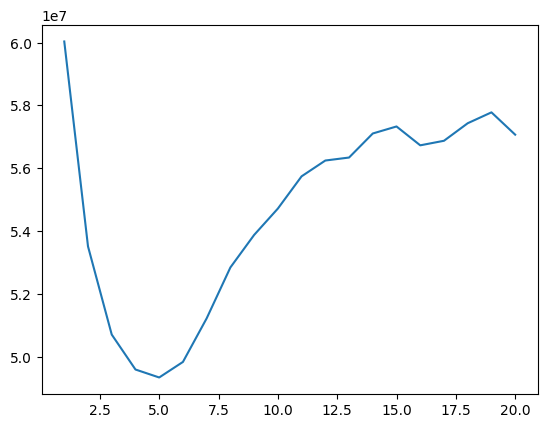

In [67]:
#depth of 5 has lowest rmse 
print(plt.plot(final_model.depth, final_model.rmse))

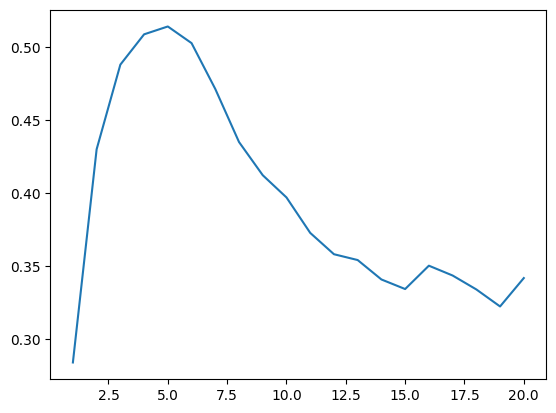

In [68]:
#depth of 5 has highest r2
print(plt.plot(final_model.depth, final_model.r2))

In [36]:
best #depth of 5, matches estimator

DecisionTreeRegressor(max_depth=5, random_state=30)

In [37]:
#how much each variable affected decision making 
varimp=pd.DataFrame(best.feature_importances_,index = x.columns,columns=['importance']).sort_values('importance', ascending=False)
print(varimp)

                           importance
num_voted_users              0.598249
budget                       0.237617
content_rating               0.049156
title_year                   0.027065
duration                     0.026659
movie_imdb_link              0.015959
director_name                0.009090
num_user_for_reviews         0.008172
imdb_score                   0.007518
movie_facebook_likes         0.007103
actor_3_name                 0.006796
genres                       0.006617
movie_title                  0.000000
cast_total_facebook_likes    0.000000
actor_1_name                 0.000000
facenumber_in_poster         0.000000
plot_keywords                0.000000
actor_1_facebook_likes       0.000000
language                     0.000000
country                      0.000000
actor_2_name                 0.000000
actor_3_facebook_likes       0.000000
director_facebook_likes      0.000000
actor_2_facebook_likes       0.000000
num_critic_for_reviews       0.000000
aspect_ratio

Axes(0.125,0.11;0.775x0.77)


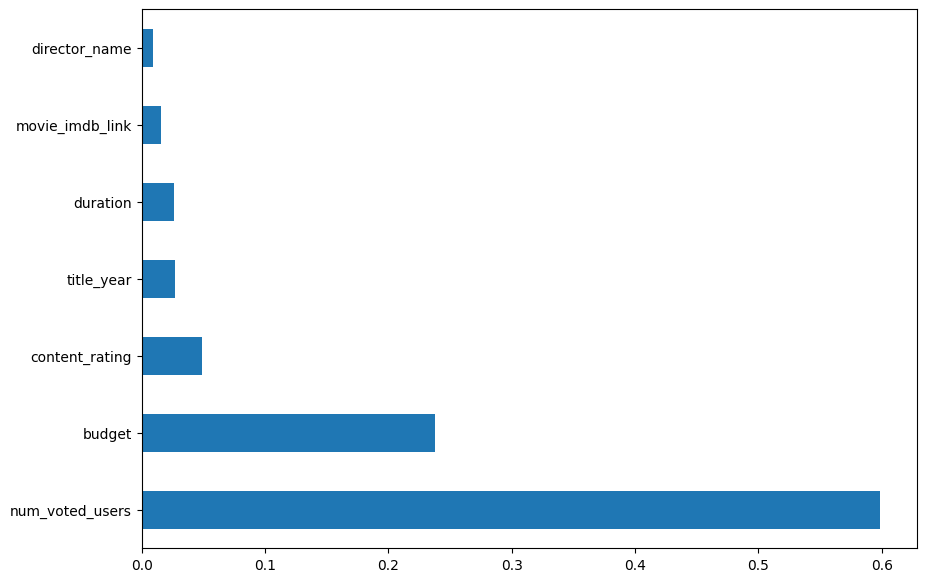

In [38]:
#14 Which variables appear to be contributing the most (variable importance) 
plt.figure(figsize=(10,7))
print(varimp.importance.nlargest(7).plot(kind='barh')) 
#num_voted_users contributed significantly 

In [39]:
#15 Create a model object using the best model hyperparameter value from the trained regression tree
best

DecisionTreeRegressor(max_depth=5, random_state=30)

In [40]:
#16 Using the best model predict on the test data and print out the results
pred=best.predict(x_test)
pred[:10]

array([3.05957071e+07, 6.19395483e+07, 1.77687957e+07, 1.61461138e+08,
       2.31364091e+08, 1.42487395e+07, 6.87538319e+07, 5.35829337e+07,
       3.75877358e+07, 2.31364091e+08])

In [41]:
#accuracy 
#accuracy on test data is low, less than 50% 
best.score(x_test, y_test)

0.40813923740199853

In [43]:
#17 How does the model perform on the test data as compared to the training data?
#training data is significantly more accurate, which could indicate overfitting 
best.score(x_tune, y_tune) 

0.5889057687176122

In [44]:
#rsquared
metrics.r2_score(y_test, pred)
#0.516890 r2 training data, training data performs better 

0.40813923740199853

In [45]:
#rmse, want rmse to be low 
np.sqrt(metrics.mean_squared_error(y_test, pred))
#4.914488e+07 rmse training data, training data performs better 

53795321.32175404

In [78]:
#mae, want mae to be low 
metrics.mean_absolute_error(y_test, pred) 
#2.922224e+07 mae training data, test data performs better 

26360263.974113587

In [68]:
#19 What five movies are predicted to have the lowest gross revenue from the test set? 

predictions = model.predict(x_test)

#df with actual gross revenue (y_test), and predicted gross revenue
results_df = pd.DataFrame({'Actual Gross': y_test, 'Predicted Gross': predictions})

#sort predicted in ascending order 
results_sorted = results_df.sort_values(by='Predicted Gross')
results_sorted.head(30)

#many movies were predicted to have the same gross 

#1) A Madea Christmas (1899)
#2) The Statement (1830)
#3) 3 Strikes (3910)
#4) Lovely, Still (3793)
#5) I Love Your Work (4399)

,Actual Gross,Predicted Gross
1899,52528330.0,4.423315e+06
1830,763044.0,4.423315e+06
3910,9821335.0,4.423315e+06
3793,124720.0,4.423315e+06
4399,2580.0,4.423315e+06
3508,4720371.0,4.423315e+06
3723,19421271.0,4.423315e+06
1988,9286314.0,4.423315e+06
1956,16118077.0,4.423315e+06
4518,1400000.0,4.423315e+06


In [73]:
row_index = 4399
values_of_row = movie_metadata.loc[row_index].values
values_of_row

array(['Color', 'Adam Goldberg', 22.0, 111.0, 1000.0, 127.0,
       'Marisa Coughlan', 2000.0, 2580.0, 'Drama|Mystery', 'Judy Greer',
       'I Love Your Work\xa0', 1618, 2564, 'Nicky Katt', 2.0,
       'film student|marriage|mental breakdown|movie star|obsession',
       'http://www.imdb.com/title/tt0322700/?ref_=fn_tt_tt_1', 40.0,
       'English', 'USA', 'R', 1650000.0, 2003.0, 163.0, 5.4, 2.35, 63],
      dtype=object)

In [49]:
# #20 Summarize what you learned along the way and make recommendations on how this could be used moving forward, being careful not to over promise.

# the model produced better rmse and r2, and mae scores on the training set than it did on the test set; which may indicate overfitting on the training data
# overfitting can be improved by reducing complexity; test, train, tune data could be split into 90/5/5; by increasing the size of the training data set the model may be exposed to more underlying patterins in the data

# however, mae performed better in the test set 
# random splitting of data could have also caused variability in model performance; in this instance, the test set may have performed better by chance 
# another explanation could be data leakage; data from the test set may have been used inadvertently during training

#still accuracy of the model was low, especially with the test data
#accuracy could be improved through hyperparameter tuning such as setting a higher value for min_samples_split to capturing more general patterns in the data 

#future use of the model could include capturing the direct relationship between director name and gross revenue or other variables through feature engineering 
#the model could be used to determine which variables are the most significant in predicting gross revenue to then determine which movies are worthwile investments 